In [94]:
import numpy as np
from numpy import cos, sin, tan, arccos, arcsin, arctan, arctan2, pi
from numpy import linalg as LA
from numpy.linalg import norm
import matplotlib.pyplot as plt
%matplotlib notebook
from matplotlib.patches import Ellipse, Rectangle

In [2]:
def fx(phi, lam, r, lam0 = 0):
    x = r*(pi/2 - phi) * sin(lam - lam0)
    return x

In [3]:
def fy(phi, lam, r, lam0 = 0):
    y = -r*(pi/2 - phi) * cos(lam - lam0)
    return y

In [246]:
def mat_jacobian(phi, lam, r):
    # Derivatives - polar perspective (i.e. phi_1 = 90, lambda_0 = 0)
    phi *= pi/180
    lam *= pi/180
    dx_dphi = -sin(lam)
    dy_dphi = cos(lam)
    # Do not forget the 1/cos(phi) for the gradients in spherical coordinate. seen as 1/sin(phi) if phi is colatitude
    # See eq. 4-10 and 4-11 of USGS 1395 for h and k
    dx_dlam = (pi/2 - phi)*cos(lam)/cos(phi)  
    dy_dlam = (pi/2 - phi)*sin(lam)/cos(phi)
    # Jacobian matrix
    jac_mat = np.array([
        [dx_dphi, dx_dlam], 
        [dy_dphi, dy_dlam]
    ])
    
    return jac_mat

In [247]:
def get_phi(x, y, r):
    if x == 0 and y ==0:
        return pi/2
    rho = np.sqrt(x**2 + y**2)
    c = rho/r
    phi = arcsin(cos(c))
    return phi

def get_lam(x, y, lam0=0):
    if x == 0 and y == 0:
        return lam0
    lam = lam0 + arctan2(y,x) + pi/2
    if lam > pi:
        lam = lam - 2*pi
    return lam

# Given 2 values along the same axis, get their (phi, lam) coordinates and compute the great circle distance
def get_arc_distance(phi_a, lam_a, phi_b, lam_b, r):
    # Input angles must be in radians!!
    dphi = phi_a - phi_b
    dlam = lam_a - lam_b
    # Central angle between the 2 points
    dsig = arccos(sin(phi_a)*sin(phi_b) + cos(phi_a)*cos(phi_b)*cos(dlam))
    # great circle arc length
    dist = r*dsig
    return dist

# Finally, given 2 points (x,y) coordinates, get their distance on the great circle. 
def gc_dist(x1, y1, x2, y2, r, lam0=0):
    phi_a = get_phi(x1, y1, r)
    lam_a = get_lam(x1, y1, lam0=lam0)
    phi_b = get_phi(x2, y2, r)
    lam_b = get_lam(x2, y2, lam0=lam0)
    d = get_arc_distance(phi_a, lam_a, phi_b, lam_b, r)
    return d

def get_scale(x, y, r):
    phi = get_phi(x, y, r)
    k_scale = k(phi)
    return k_scale

In [6]:
# Get some scaling constants
# Radius of the sphere used for plotting (in pixels). Is it the radius??
r = 1000

## Parametrize a unit circle tangent to the sphere at the local point

#### Plot these projected points as if they were from a circle centered at coordinates (0,0).

<IPython.core.display.Javascript object>


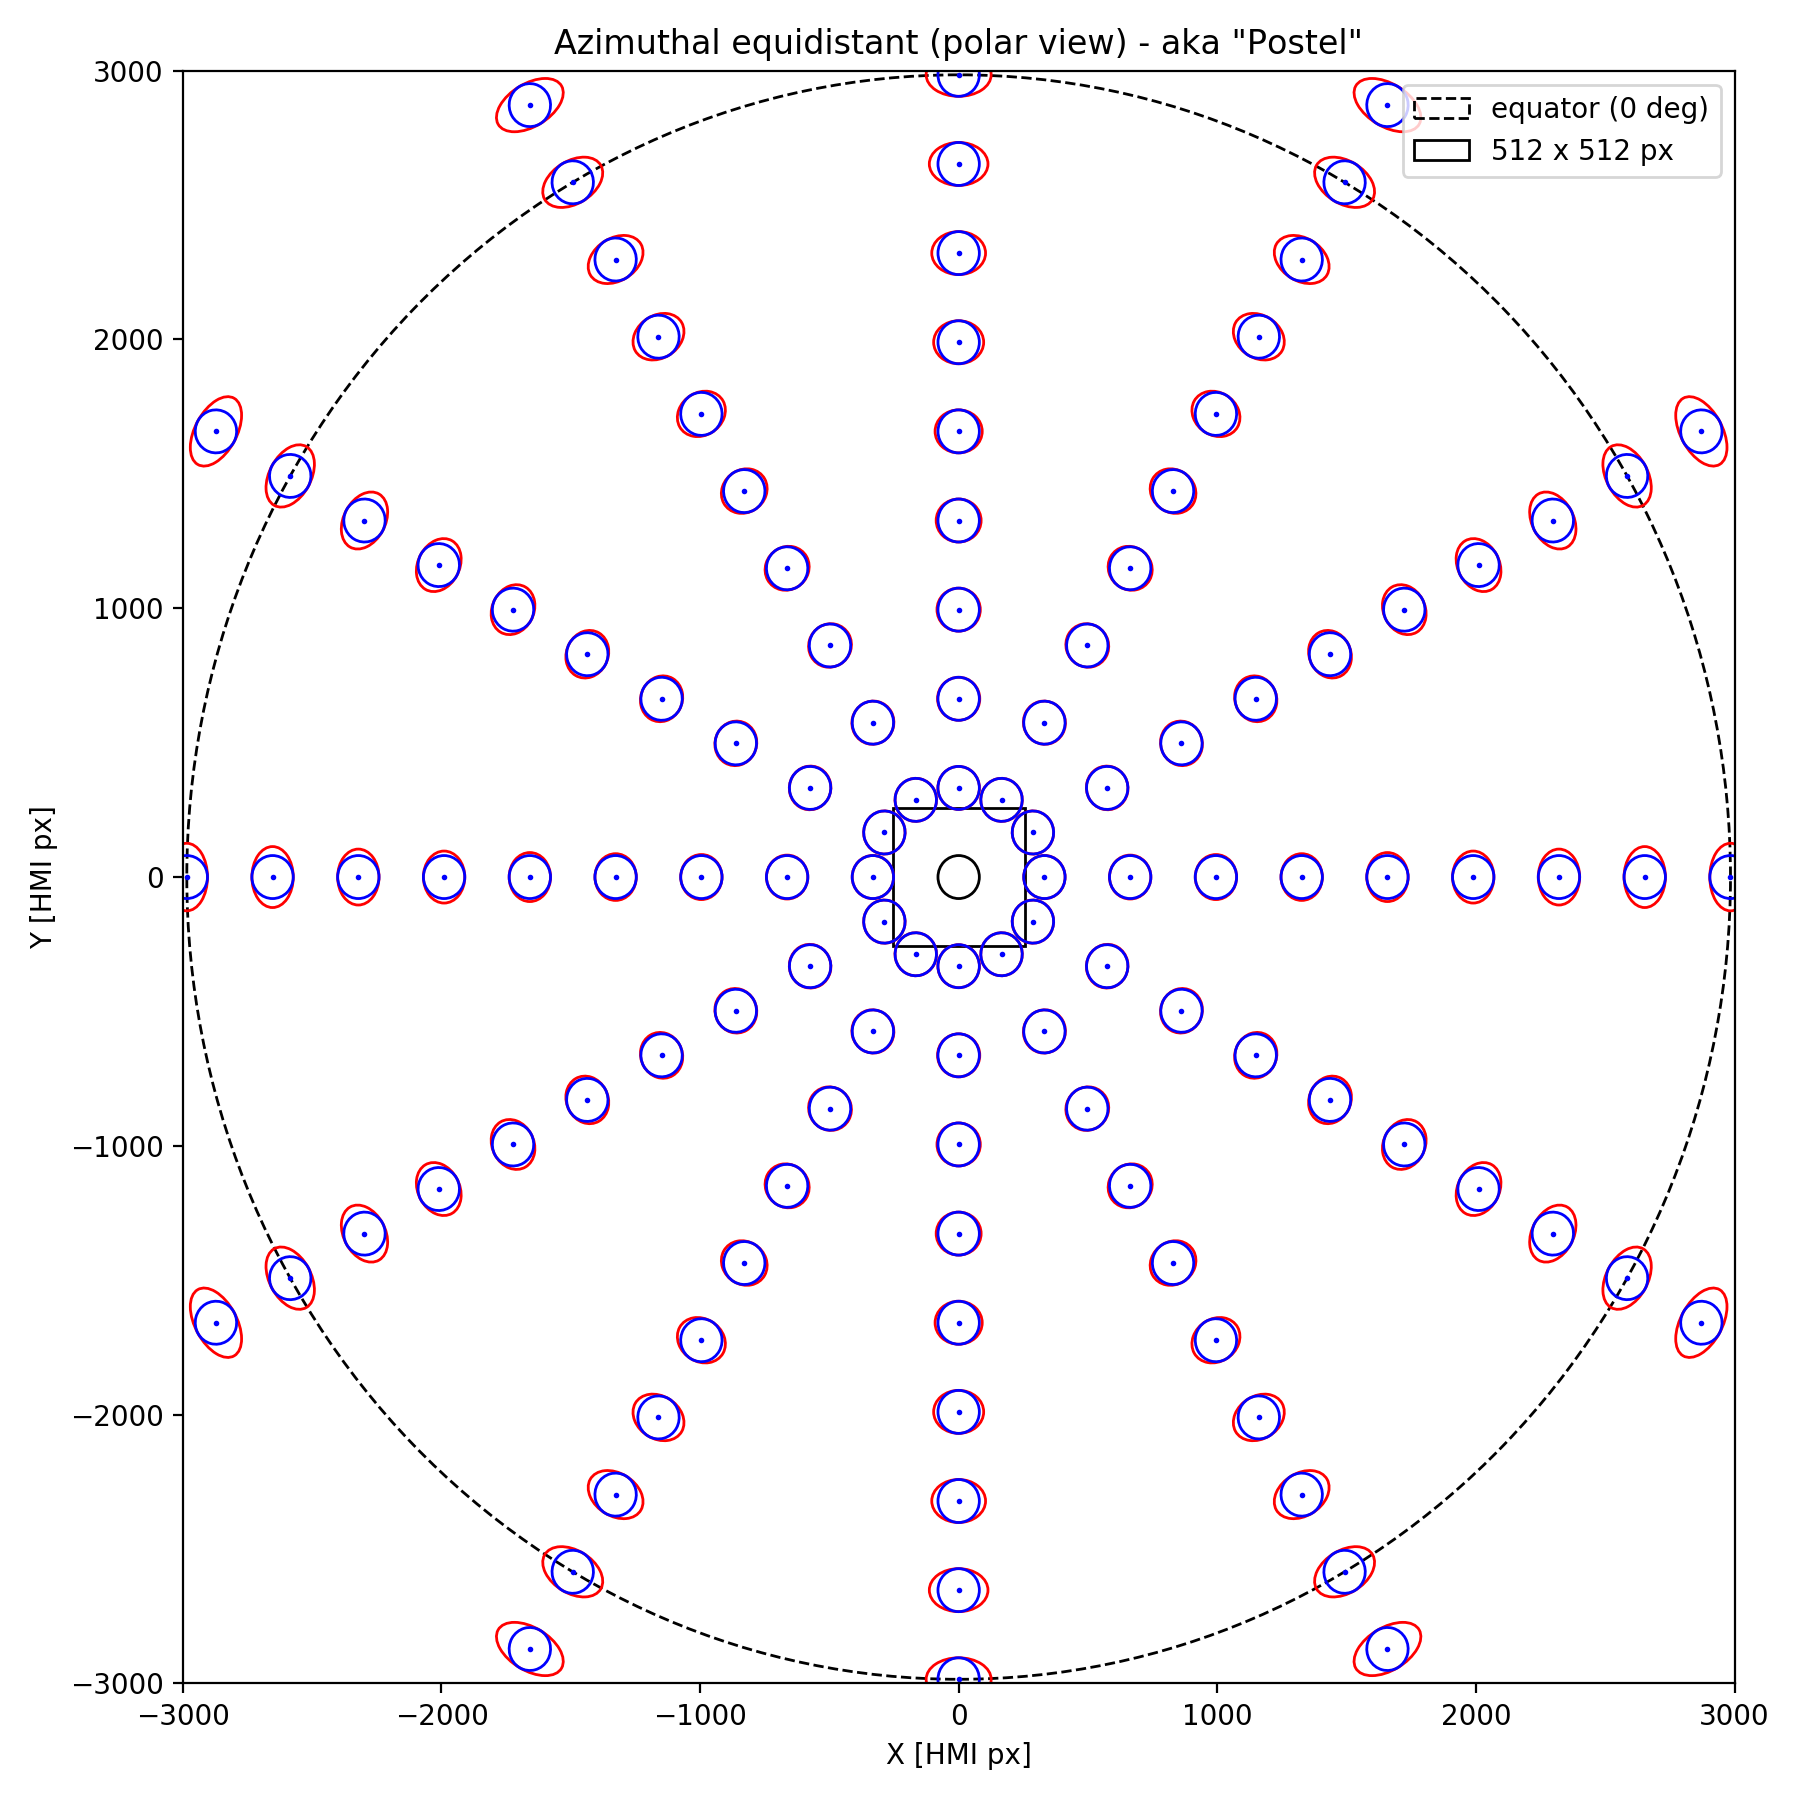

In [272]:
r = 1900
lams, phis = np.meshgrid(np.arange(-180, 180, 30)*pi/180, np.arange(-70, 90, 10)*pi/180)
x = fx(phis, lams, r)
y = fy(phis, lams, r)

%matplotlib notebook
plt.figure(figsize=(9,9))
c0 = Ellipse((0, 0), 2*80, 2*80, 0, color='black', fill=False)
c1 = Ellipse((0, 0), pi*r, pi*r, 0, color='black', ls='--', fill=False)
c2 = Ellipse((0, 0), 2*pi*r, 2*pi*r, 0, color='black', fill=False)
rec = Rectangle((-255, -256), 512, 512, color='black', ls = '-', lw=1, fill=False)

plt.gca().add_artist(c0)
plt.gca().add_artist(c1)
plt.gca().add_artist(c2)
plt.gca().add_artist(rec)
plt.legend([c1, rec], ['equator (0 deg)', '512 x 512 px'])

plt.plot(x, y, 'b.', ms=2)


for xi, yi, p, lam in zip(x.ravel(), y.ravel(), phis.ravel(), lams.ravel()):
    ell0 = Ellipse((xi, yi), 2*80, 2*80, lam*180/pi, color='blue', fill=False)
    ell = Ellipse((xi, yi), 2*k(p)*80, 2*h*80, lam*180/pi, color='red', fill=False)
    plt.gca().add_artist(ell)
    plt.gca().add_artist(ell0)
    
plt.axis([-3000, 3000, -3000, 3000])
plt.xlabel('X [HMI px]')
plt.ylabel('Y [HMI px]')
plt.title('Azimuthal equidistant (polar view) - aka "Postel"')
plt.tight_layout()
plt.savefig('polar_azimuthal_equidistant_postel.png', dpi=180)

## Compute the distances or scales over the x and y axis

<IPython.core.display.Javascript object>


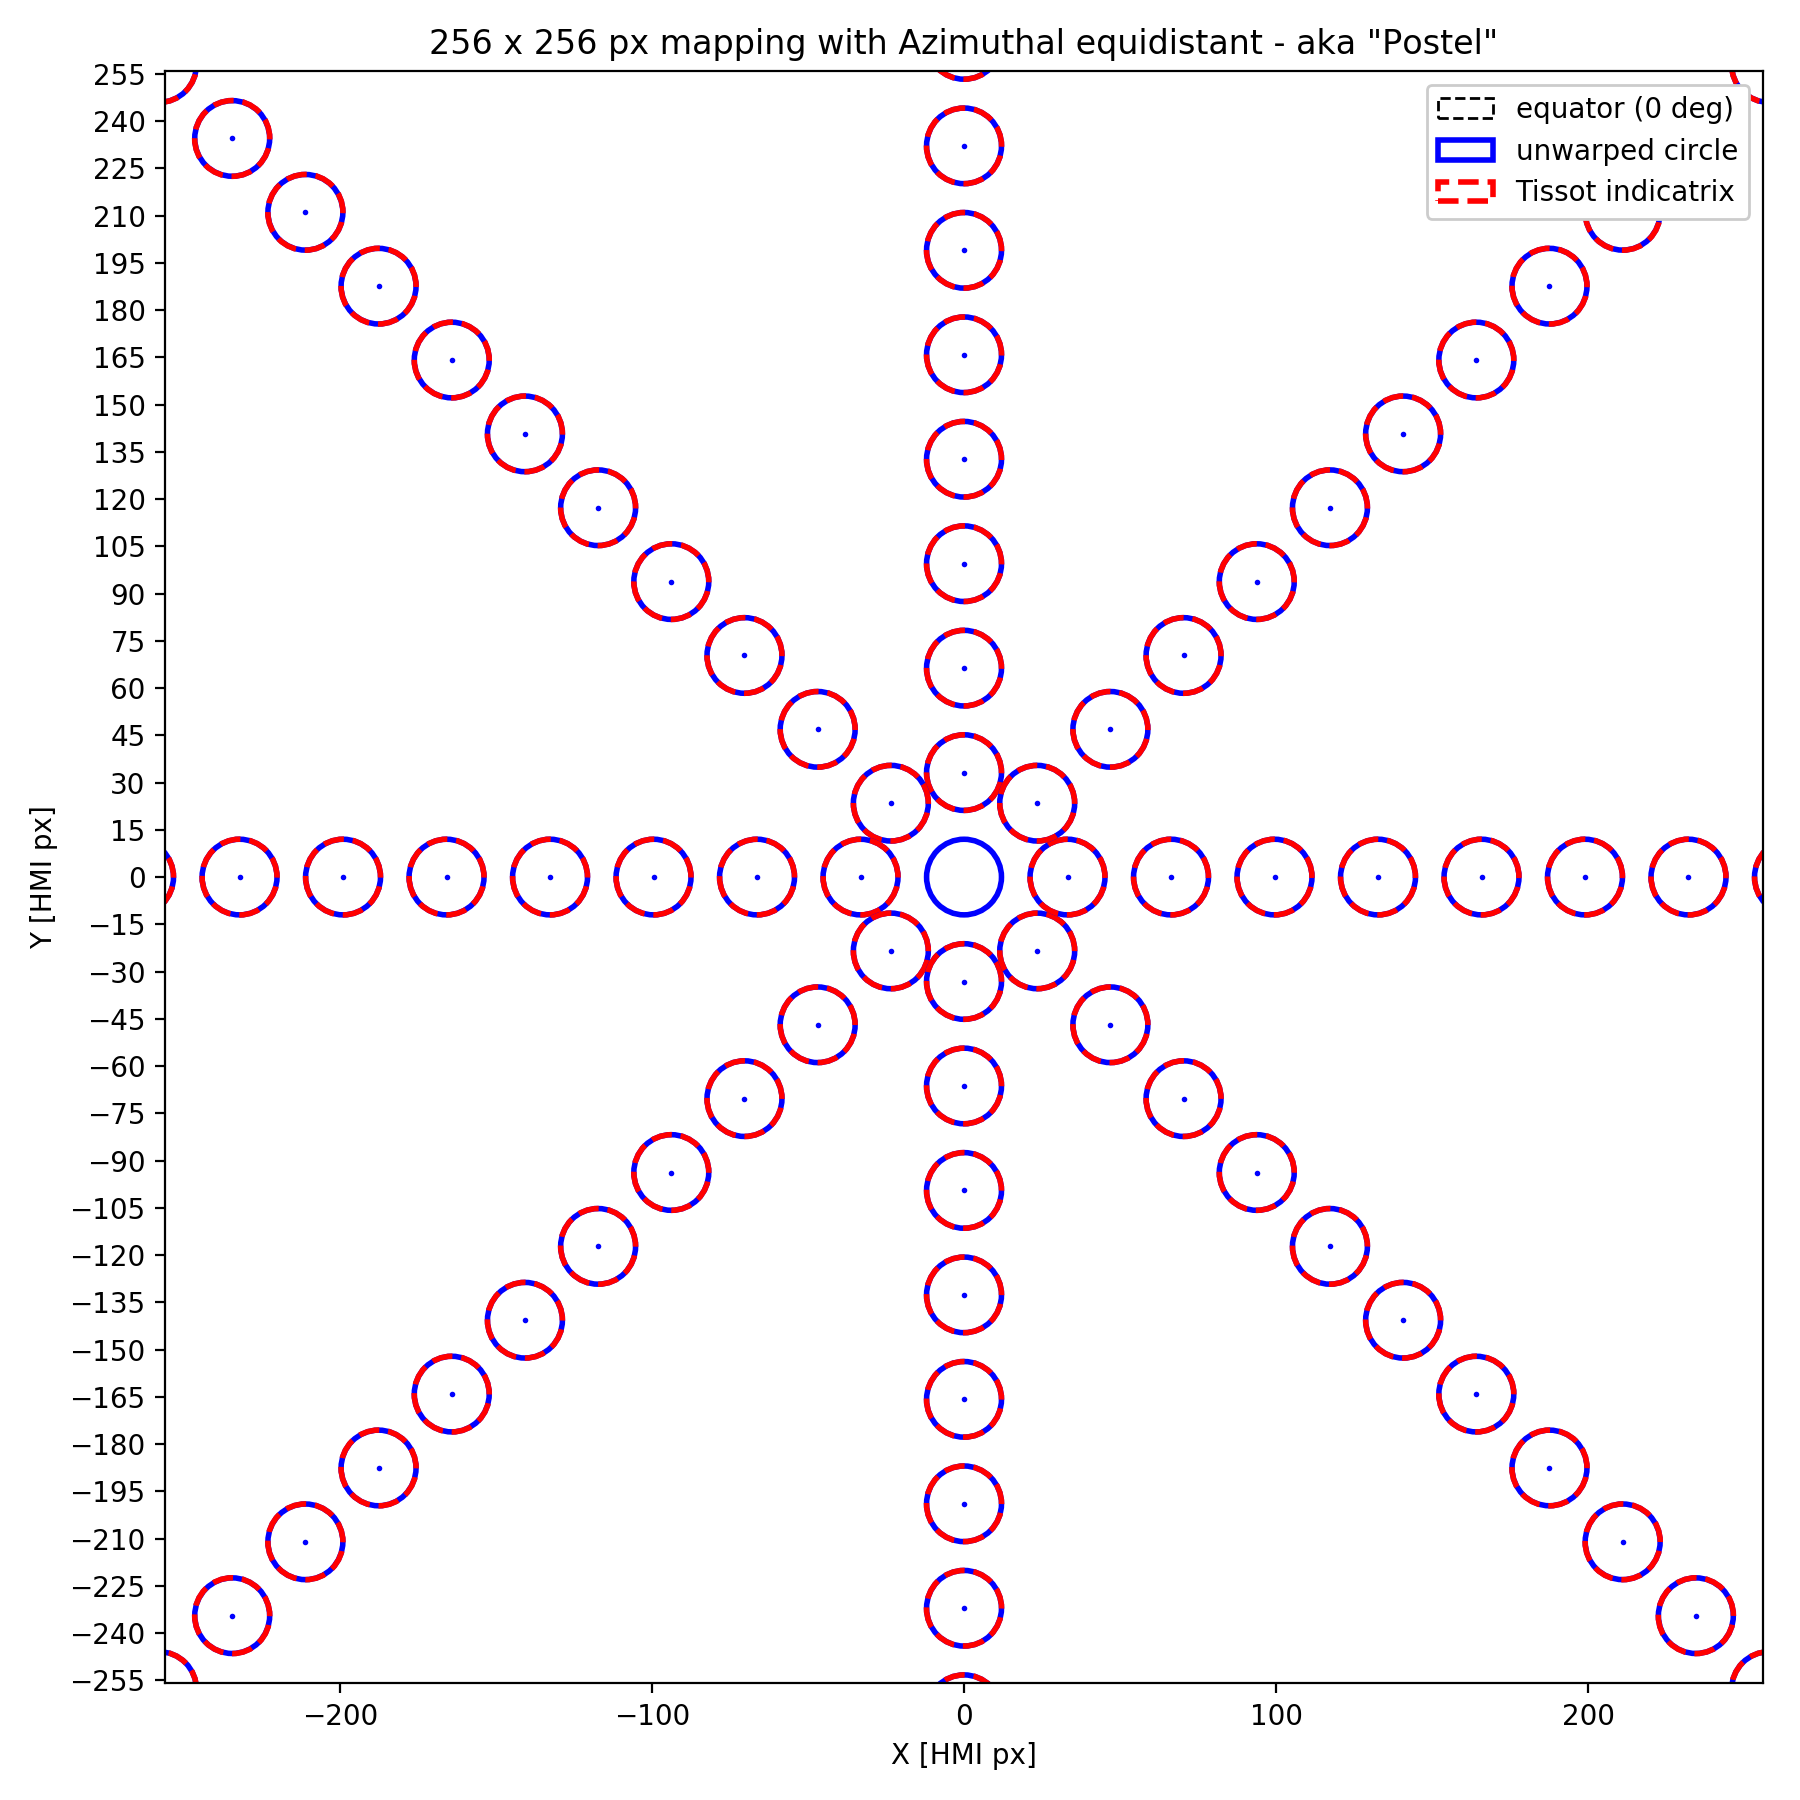

In [293]:
r = 1900
lams, phis = np.meshgrid(np.arange(-180, 180, 45)*pi/180, np.arange(30, 90, 1)*pi/180)
x = fx(phis, lams, r)
y = fy(phis, lams, r)

# magnification factor of the unit circle
mf = 12
%matplotlib notebook
plt.figure(figsize=(9,9))
c0 = Ellipse((0, 0), 2*mf, 2*mf, 0, color='blue', lw=2, fill=False)

#rec = Rectangle((-255, -256), 512, 512, color='black', ls = '-', lw=1, fill=False)


plt.gca().add_artist(c0)
#plt.gca().add_artist(rec)

plt.plot(x, y, 'b.', ms=2)


for xi, yi, p, lam in zip(x.ravel(), y.ravel(), phis.ravel(), lams.ravel()):
    ell0 = Ellipse((xi, yi), 2*mf, 2*mf, lam*180/pi, color='blue', lw=2, fill=False)
    ell = Ellipse((xi, yi), 2*k(p)*mf, 2*h*mf, lam*180/pi, color='red', ls='--', lw=2, fill=False)
    plt.gca().add_artist(ell0)
    plt.gca().add_artist(ell)
    
plt.legend([c1, c0, ell], ['equator (0 deg)', 'unwarped circle', 'Tissot indicatrix'], 
           loc='upper right', framealpha=1)
    
plt.axis([-256, 256, -256, 256])
plt.xlabel('X [HMI px]')
plt.ylabel('Y [HMI px]')
plt.yticks(np.arange(-255, 256, 15))
plt.title('256 x 256 px mapping with Azimuthal equidistant - aka "Postel"')
plt.tight_layout()
plt.savefig('polar_azimuthal_equidistant_postel_zoom.png', dpi=180)

In [245]:
x1, y1 = (0.0, 512.0)
x2, y2 = (1.0, 512.0)
r = 1900

d = gc_dist(x1, y1, x2, y2, r)
print('distance = {:0.3f}'.format(d))
print('scale error = {:0.3f}'.format((1-d)*100))

distance = 0.988
scale error = 1.206


### Plot the scale over the vertical axis in a 1D plot?

In [282]:
(get_scale(0.0, 512, r) - 1) * 100

1.220600106466474

<IPython.core.display.Javascript object>


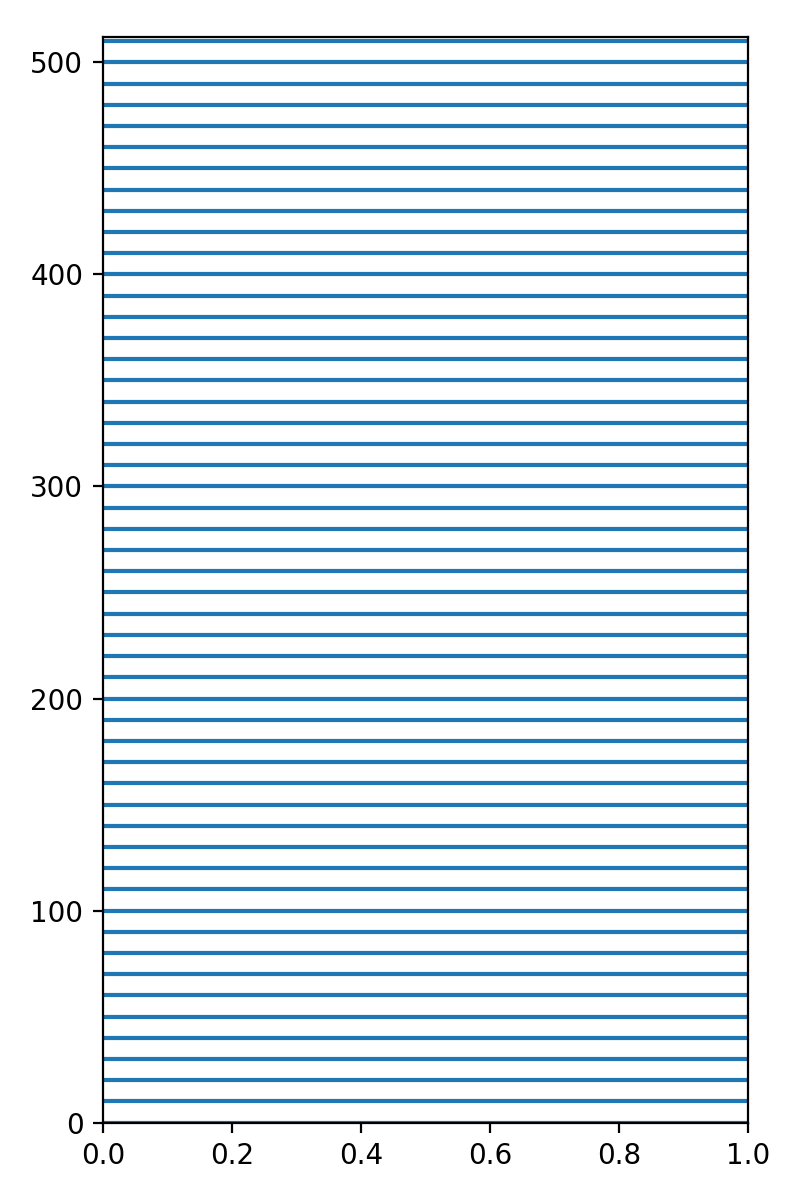

In [248]:
ks = [get_scale(0, y, r) for y in range(0,512)]

plt.figure(figsize=(4,6))
for yi in range(0,512,10):
    plt.axhline(y=yi, xmin=0, xmax=ks[i])
plt.axis([0, 1, 0, 512])
plt.tight_layout()